## Installing Required Materials 

In [1]:
!pip install cpi

In [35]:
import pandas as pd
import hvplot.pandas
import numpy as np
import cpi
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

## Reading and Preprocessing Data


In [3]:
#reading home price index
df_hpi = pd.read_csv("../Resources/Data/Home-price-index.csv")

df_hpi.head()

,DATE,CSUSHPISA
0,1/1/1987,63.964
1,2/1/1987,64.424
2,3/1/1987,64.736
3,4/1/1987,65.132
4,5/1/1987,65.563


In [4]:
#investigating data for data types
df_hpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       439 non-null    object 
 1   CSUSHPISA  439 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.0+ KB


In [5]:
#rename columns
df_hpi.rename(columns={"DATE" : "Date", "CSUSHPISA" : "HPI" }, inplace=True)
df_hpi.head()

#converting to datetime 
df_hpi["Date"] = pd.to_datetime(df_hpi["Date"])

df_hpi.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    439 non-null    datetime64[ns]
 1   HPI     439 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.0 KB


In [6]:
#reading cpi dataset
df_cpi = pd.read_csv("../Resources/Data/US_inflation_rates.csv")

df_cpi.head()

,date,value
0,1/1/1947,21.48
1,2/1/1947,21.62
2,3/1/1947,22.00
3,4/1/1947,22.00
4,5/1/1947,21.95


In [7]:
#renaming columns
df_cpi.rename(columns={"date" : "Date" , "value" : "CPI"}, inplace=True)
df_cpi.head()

,Date,CPI
0,1/1/1947,21.48
1,2/1/1947,21.62
2,3/1/1947,22.00
3,4/1/1947,22.00
4,5/1/1947,21.95


In [8]:
#converting date column data to datetime
df_cpi["Date"] = pd.to_datetime(df_cpi["Date"])
df_cpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    918 non-null    datetime64[ns]
 1   CPI     918 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.5 KB


In [9]:
#reading unemployment data
df_unem = pd.read_csv("../Resources/Data/FRED_unemp_rate.csv")

df_unem.head()

,DATE,UNRATE
0,1/1/1948,3.4
1,2/1/1948,3.8
2,3/1/1948,4.0
3,4/1/1948,3.9
4,5/1/1948,3.5


In [10]:
#renaming columns
df_unem.rename(columns={"DATE" : "Date", "UNRATE" : "Unemployment"}, inplace=True)
df_unem.head()

,Date,Unemployment
0,1/1/1948,3.4
1,2/1/1948,3.8
2,3/1/1948,4.0
3,4/1/1948,3.9
4,5/1/1948,3.5


In [11]:
#converting date column data to datetime
df_unem["Date"] = pd.to_datetime(df_unem["Date"])
df_unem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          923 non-null    datetime64[ns]
 1   Unemployment  923 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.5 KB


In [12]:
#reading mortgage data
df_mortage_30 = pd.read_csv("../Resources/Data/MORTGAGE30US.csv")
df_mortage_30.head()

,observation_date,MORTGAGE30US
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29


In [13]:
#checking dataset and renaming columns 
df_mortage_30.info()
df_mortage_30.rename(columns={"observation_date" : "Date", "MORTGAGE30US" : "Fixed rate 30"}, inplace=True)
df_mortage_30.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2803 entries, 0 to 2802
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  2803 non-null   object 
 1   MORTGAGE30US      2803 non-null   float64
dtypes: float64(1), object(1)
memory usage: 43.9+ KB


,Date,Fixed rate 30
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29


In [14]:
#converting date column data to datetime
df_mortage_30["Date"] = pd.to_datetime(df_mortage_30["Date"])
df_mortage_30.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2803 entries, 0 to 2802
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2803 non-null   datetime64[ns]
 1   Fixed rate 30  2803 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 43.9 KB


## Merging Data

In [15]:
#merging cpi and hpi datasets
df_cpi_hpi = pd.merge(df_hpi, df_cpi, how='inner', on="Date" )
df_cpi_hpi.head()

,Date,HPI,CPI
0,1987-01-01,63.964,111.4
1,1987-02-01,64.424,111.8
2,1987-03-01,64.736,112.2
3,1987-04-01,65.132,112.7
4,1987-05-01,65.563,113.0


In [16]:
#merging new cpi and hpi with unemployment dataset 
df_cpi_hpi_unem = pd.merge(df_cpi_hpi, df_unem, how='inner', on="Date")
df_cpi_hpi_unem.head()

,Date,HPI,CPI,Unemployment
0,1987-01-01,63.964,111.4,6.6
1,1987-02-01,64.424,111.8,6.6
2,1987-03-01,64.736,112.2,6.6
3,1987-04-01,65.132,112.7,6.3
4,1987-05-01,65.563,113.0,6.3


In [25]:
#merging new cpi, hpi, and unemployment with mortgage dataset
df_cpi_hpi_unem_mort = pd.merge(df_cpi_hpi_unem, df_mortage_30, how='inner', on="Date")
df_index = df_cpi_hpi_unem_mort.set_index("Date")
df_index.head()


,HPI,CPI,Unemployment,Fixed rate 30
Date,,,,
1987-05-01,65.563,113.0,6.3,10.47
1988-04-01,69.977,117.2,5.4,10.05
1988-07-01,71.354,118.5,5.4,10.39
1989-09-01,76.056,124.8,5.3,10.22
1989-12-01,76.705,126.3,5.4,9.74


In [27]:
#filter data to show only 2015 to 2024
df_index_2015_2024 = df_index.loc["2015-01-01" : "2024-01-01"] 
df_index_2015_2024

,HPI,CPI,Unemployment,Fixed rate 30
Date,,,,
2015-10-01,174.792,237.733,5.0,3.85
2016-09-01,182.824,241.176,5.0,3.46
2016-12-01,185.725,242.637,4.7,4.08
2017-06-01,190.510,244.163,4.3,3.94
2018-02-01,199.217,249.529,4.1,4.22
2018-03-01,199.954,249.577,4.0,4.43
2018-11-01,205.685,252.594,3.8,4.83
2019-08-01,210.120,256.059,3.6,3.75
2020-10-01,229.840,260.286,6.8,2.88


In [28]:
#run correlation
corr_matrix = df_index_2015_2024[["HPI", "CPI", "Unemployment","Fixed rate 30"]].corr()
corr_matrix


,HPI,CPI,Unemployment,Fixed rate 30
HPI,1.000000,0.989555,-0.215485,0.608077
CPI,0.989555,1.000000,-0.321462,0.705924
Unemployment,-0.215485,-0.321462,1.000000,-0.767006
Fixed rate 30,0.608077,0.705924,-0.767006,1.000000


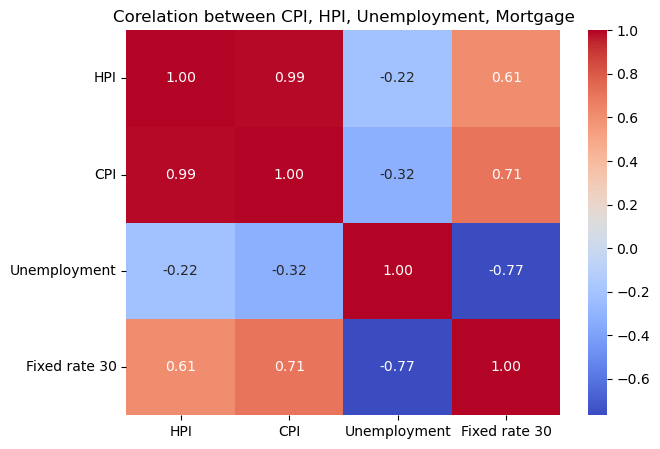

In [29]:
#plot heatmap 
plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt=".2f",cbar=True)
plt.title("Corelation between CPI, HPI, Unemployment, Mortgage")

plt.show()

In [31]:
#indexing to show years 2015-2024
df_index_2015_2024["Year"]= df_index_2015_2024.index.year


df_index_2015_2024["Month"]= df_index_2015_2024.index.month

df_index_2015_2024["Quarter"]= df_index_2015_2024.index.quarter

df_index_2015_2024.head()


/var/folders/sf/rvzdhmmj4sl73_0crwj_hxbm0000gn/T/ipykernel_9658/166458577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_index_2015_2024["Year"]= df_index_2015_2024.index.year
/var/folders/sf/rvzdhmmj4sl73_0crwj_hxbm0000gn/T/ipykernel_9658/166458577.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_index_2015_2024["Month"]= df_index_2015_2024.index.month
/var/folders/sf/rvzdhmmj4sl73_0crwj_hxbm0000gn/T/ipykernel_9658/166458577.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy

,HPI,CPI,Unemployment,Fixed rate 30,Year,Month,Quarter
Date,,,,,,,
2015-10-01,174.792,237.733,5.0,3.85,2015,10,4
2016-09-01,182.824,241.176,5.0,3.46,2016,9,3
2016-12-01,185.725,242.637,4.7,4.08,2016,12,4
2017-06-01,190.510,244.163,4.3,3.94,2017,6,2
2018-02-01,199.217,249.529,4.1,4.22,2018,2,1


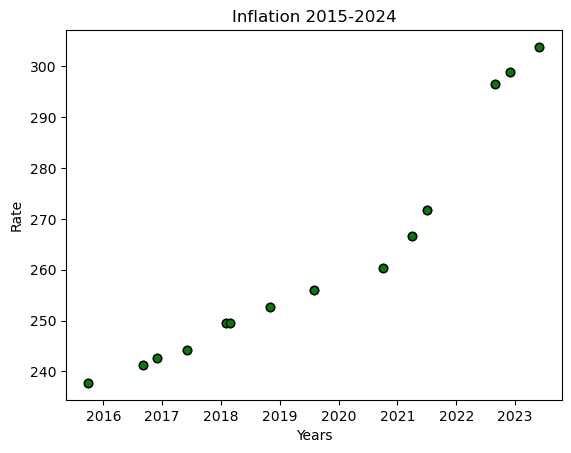

In [37]:
#isolating inflation data from 2015 - 2024 and displaying data
x_values = df_index_2015_2024.index
y_values = df_index_2015_2024["CPI"]

plt.scatter(x_values, y_values, c="green", edgecolors="black")
plt.title("Inflation 2015-2024")
plt.xlabel("Years")
plt.ylabel("Rate")

#prophet

plt.show()

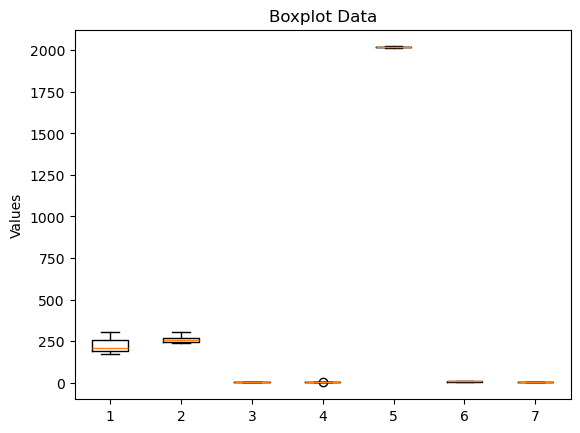

In [39]:
#plot boxplot
plt.boxplot(df_index_2015_2024)
plt.title("Boxplot Data")
plt.ylabel("Values")

plt.show()